In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
df = pd.read_csv('american.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={42: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A
2,0.299407,0.679288,0.210996,0.613102,0.150618,0.522777,0.127314,0.438344,0.130090,0.381808,...,0.574705,0.358198,0.506751,0.360233,0.452296,0.350743,0.506043,0.339431,0.557486,A
3,0.284236,0.729573,0.173007,0.635995,0.111589,0.496627,0.109330,0.372887,0.124706,0.266505,...,0.608846,0.450521,0.479627,0.401771,0.453182,0.359019,0.534598,0.349776,0.602132,A
4,0.272220,0.750940,0.151656,0.647857,0.090840,0.491623,0.096680,0.370796,0.111904,0.266032,...,0.641275,0.449075,0.491492,0.394166,0.473755,0.353244,0.558699,0.346559,0.625984,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77994,0.526264,0.677356,0.405371,0.684395,0.335519,0.593608,0.387241,0.459165,0.450325,0.363955,...,0.523216,0.504606,0.434744,0.525846,0.400675,0.525645,0.488662,0.509252,0.529258,Z
77995,0.524471,0.684394,0.401440,0.688333,0.329967,0.594382,0.379672,0.458701,0.442549,0.363953,...,0.521610,0.506394,0.435055,0.525869,0.390700,0.524858,0.478981,0.509965,0.520434,Z
77996,0.522581,0.677694,0.397469,0.681666,0.327541,0.590112,0.389733,0.455139,0.467794,0.375672,...,0.504175,0.501952,0.435226,0.517287,0.387353,0.518052,0.469302,0.505998,0.502548,Z
77997,0.532845,0.682315,0.400254,0.683759,0.322961,0.584981,0.387589,0.448374,0.470393,0.373412,...,0.500650,0.511076,0.435591,0.523066,0.379406,0.523126,0.453426,0.514232,0.487108,Z


In [3]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (77999, 43)


In [4]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 37963


In [5]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
2,0.299407,0.679288,0.210996,0.613102,0.150618,0.522777,0.127314,0.438344,0.130090,0.381808,...,0.574705,0.358198,0.506751,0.360233,0.452296,0.350743,0.506043,0.339431,0.557486,A
3,0.284236,0.729573,0.173007,0.635995,0.111589,0.496627,0.109330,0.372887,0.124706,0.266505,...,0.608846,0.450521,0.479627,0.401771,0.453182,0.359019,0.534598,0.349776,0.602132,A
4,0.272220,0.750940,0.151656,0.647857,0.090840,0.491623,0.096680,0.370796,0.111904,0.266032,...,0.641275,0.449075,0.491492,0.394166,0.473755,0.353244,0.558699,0.346559,0.625984,A
5,0.260565,0.761086,0.142162,0.655401,0.082593,0.493751,0.091608,0.371733,0.114751,0.272436,...,0.659603,0.449525,0.506806,0.382283,0.482948,0.344662,0.565404,0.340645,0.630759,A
6,0.265526,0.763699,0.146010,0.672900,0.075502,0.512883,0.077790,0.386985,0.105156,0.280604,...,0.674028,0.431689,0.497543,0.382958,0.486625,0.351145,0.573781,0.344029,0.640121,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77994,0.526264,0.677356,0.405371,0.684395,0.335519,0.593608,0.387241,0.459165,0.450325,0.363955,...,0.523216,0.504606,0.434744,0.525846,0.400675,0.525645,0.488662,0.509252,0.529258,Z
77995,0.524471,0.684394,0.401440,0.688333,0.329967,0.594382,0.379672,0.458701,0.442549,0.363953,...,0.521610,0.506394,0.435055,0.525869,0.390700,0.524858,0.478981,0.509965,0.520434,Z
77996,0.522581,0.677694,0.397469,0.681666,0.327541,0.590112,0.389733,0.455139,0.467794,0.375672,...,0.504175,0.501952,0.435226,0.517287,0.387353,0.518052,0.469302,0.505998,0.502548,Z
77997,0.532845,0.682315,0.400254,0.683759,0.322961,0.584981,0.387589,0.448374,0.470393,0.373412,...,0.500650,0.511076,0.435591,0.523066,0.379406,0.523126,0.453426,0.514232,0.487108,Z


In [7]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (40036, 43)


## Data Preparation

In [27]:
X = df.iloc[:, :-1].reset_index(drop=True)
print("Features shape =", X.shape)

Y = df.iloc[:, -1].reset_index(drop=True)
print("Labels shape =", Y.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([chr(i) for i in range(65,91)])

Y = pd.Series(le.transform(list(Y)))

Features shape = (40036, 42)
Labels shape = (40036,)


In [30]:
le.transform(list(Y))

array([ 0,  0,  0, ..., 25, 25, 25])

In [32]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
40031    25
40032    25
40033    25
40034    25
40035    25
Length: 40036, dtype: int64

## Data Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Model, Input
from keras.optimizers import Adam, Adagrad
from tensorflow.keras.utils import plot_model

In [ ]:
def def_model(input_dims):
    inputs = Input(shape=(input_dims, ))
    x = Dense(20, activation="relu", kernel_initializer="he_uniform")(inputs)
#     x = Dense(50, activation="relu", kernel_initializer="he_uniform")(x)
#     x = Dense(100, activation="relu", kernel_initializer="he_uniform")(x)
#     x = Dense(100, activation="relu", kernel_initializer="he_uniform")(x)
#     x = Dense(50, activation="relu", kernel_initializer="he_uniform")(x)
#     x = Dense(25, activation="relu", kernel_initializer="he_uniform")(x)
    x = Dropout(dropout)(x)
    output = Dense(26, activation='softmax' kernel_initializer="he_uniform", name="output")(x)
    return Model(inputs=inputs, outputs=output)


# Hyperparameters
input_dims = X.shape[1]
lr = 0.01
opt = Adam(learning_rate=lr)
losses = [tf.keras.losses.MeanSquaredError()]
metrics = [tf.keras.metrics.MeanAbsoluteError(name="mae")]
batch_size = 64
epochs = 60
dropout = 0.3
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                     min_delta=1e-4,
                                     patience=10,
                                     verbose=1,
                                     mode="auto",
                                     restore_best_weights=True)#,
#     keras.callbacks.CSVLogger(filename="/ansur/log.csv")
]

model = def_model(input_dims)
model.compile(optimizer=opt, loss=losses, metrics=metrics)

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(
        X_test, y_test),  #Note: considering validation data same as test data
    callbacks=my_callbacks,
    verbose=1)

In [10]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [11]:
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [12]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9950355938553765


In [13]:
y_pred = svm.predict(x_test)

In [14]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9915084915084915


## Visualization

In [15]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [16]:
f1, recall, precision

(0.9915084915084915, 0.9915084915084915, 0.9915084915084915)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

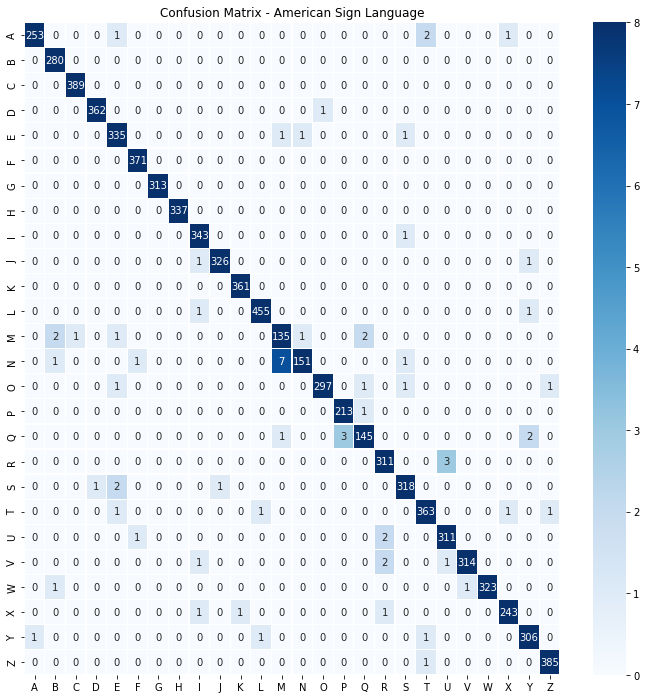

In [17]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [18]:
maping.figure.savefig("output.png")

In [20]:
import joblib
joblib.dump(svm, 'model.pkl')

['model.pkl']